**PCA + LDA with Iris Dataset**

```
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
```



In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris.target

In [ ]:
list(iris.target_names)

In [ ]:
import pandas as pd
iris_df= pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df ['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [ ]:
iris_df.describe()

PCA+LDA


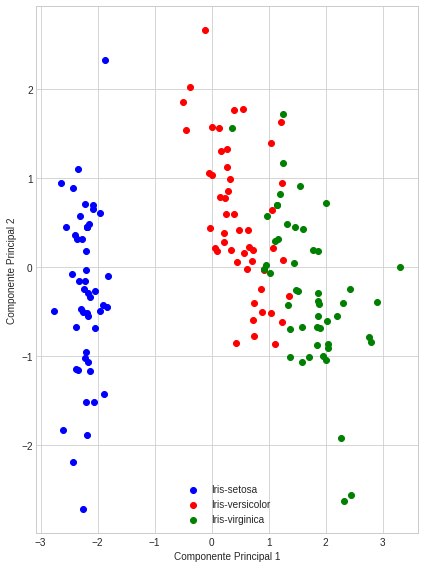

[[ 0.2015 -0.2958]
 [-0.2958  2.5589]]
[[140.1268  14.4925]
 [ 14.4925  24.6153]]


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(precision=4)


df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')
df.columns=[0, 1, 2, 3, 4]
df.dropna(how="all", inplace=True)


X = df.iloc[:,0:4].values
y = df.iloc[:,4].values


X_std = StandardScaler().fit_transform(X)
vetor_medias = np.mean(X_std, axis=0)
matriz_covariancia = (X_std - vetor_medias).T.dot((X_std - vetor_medias)) / (X_std.shape[0]-1)
matriz_covariancia = np.cov(X_std.T)
autovalores, autovetores = np.linalg.eig(matriz_covariancia)
autovalores_autovetores = [(np.abs(autovalores[i]), autovetores[:,i]) for i in range(len(autovalores))]
autovalores_autovetores.sort(key=lambda x: x[0], reverse=True)
matrix_w = np.hstack((autovalores_autovetores[0][1].reshape(4,1),
                      autovalores_autovetores[1][1].reshape(4,1)))
X1 = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 8))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(X1[y==lab, 0],
                    X1[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)
stdsc = StandardScaler()
X1_train_std = stdsc.fit_transform(X1)
S_W = np.zeros((2,2))
for i in range(3):
    S_W += np.cov(X1_train_std[y==i].T)

print(S_W)


N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X1_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X1_train_std, axis=0) # overall mean
S_B=np.zeros((2,2))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(2,1)).dot(((vecs[i]-mean_overall).reshape(1,2))))

print(S_B)


eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)


W=np.hstack((eigen_pairs[0][1][:, ].reshape(2,1),eigen_pairs[1][1][:, ].reshape(2,1))).real
X1_train_lda = X1_train_std.dot(W)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()